In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.linear_model import LinearRegression

In [2]:
data = load_iris()
print(data.DESCR[:500])


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                



In [3]:
print(data.target_names)

['setosa' 'versicolor' 'virginica']


In [4]:
X = data.data # features
y = data.target # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")
print("Targets are: ", y)

Shape of features is (150, 4), and shape of target is (150,)
Targets are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
print(data.data)
print(data.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
print(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
iris_df = pd.DataFrame(data= data.data, columns= data.feature_names)
target_df = pd.DataFrame(data= data.target, columns= ['species'])
def converter(specie):
 if specie == 0:
    return 'setosa'
 elif specie == 1:
    return 'versicolor'
 else:
    return 'virginica'
target_df['species'] = target_df['species'].apply(converter)
# Concatenate the DataFrames
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [8]:
target_df = pd.DataFrame(columns= ['species'], data= data.target)
iris_df = pd.concat([iris_df, target_df], axis= 1)

In [9]:
# Variables
X= iris_df.drop(labels = ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)', 'species'], axis= 1)
y= iris_df['sepal length (cm)']
print(X)
print(y)
# Splitting the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)


     sepal width (cm)
0                 3.5
1                 3.0
2                 3.2
3                 3.1
4                 3.6
..                ...
145               3.0
146               2.5
147               3.0
148               3.4
149               3.0

[150 rows x 1 columns]
0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64


In [10]:
# Instantiating LinearRegression() Model
lr = LinearRegression()
# Training/Fitting the Model
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
print(lr.score(X_test, y_test))
# The coefficients
print('Coefficients: \n', lr.coef_)

0.006469855487622134
Coefficients: 
 [-0.22561002]


In [12]:
# Making Predictions
lr.predict(X_test)
pred = lr.predict(X_test)
print(X_test[:5])
print(pred[:5])
print(y_test[:5])

     sepal width (cm)
33                4.2
16                3.9
43                3.5
129               3.0
50                3.2
[5.61492654 5.68260954 5.77285355 5.88565856 5.84053656]
33     5.5
16     5.4
43     5.0
129    7.2
50     7.0
Name: sepal length (cm), dtype: float64


In [13]:
# Evaluating Model's Performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


Mean Absolute Error: 0.6655951111688988
Mean Squared Error: 0.6598987478645434
Mean Root Squared Error: 0.8123415216917964


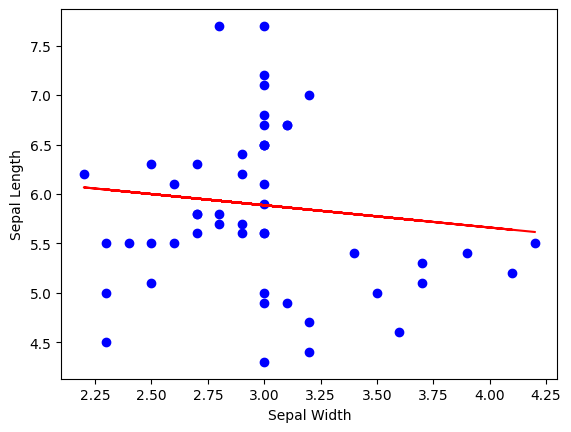

In [14]:
plt.scatter(X_test,y_test, color = 'b')
plt.plot(X_test,lr.predict(X_test),color = 'r')
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

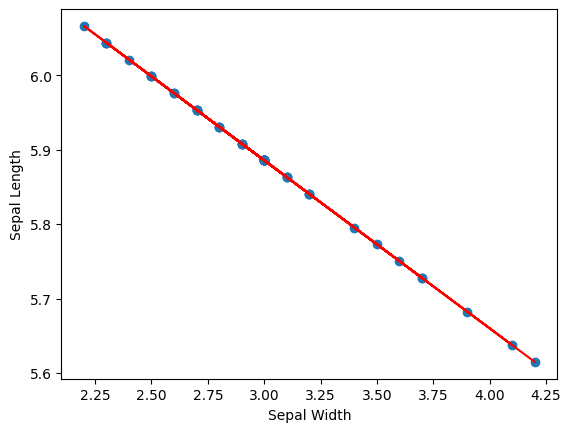

In [15]:
plt.scatter(X_test,pred)
plt.plot(X_test,lr.predict(X_test),color = 'r')
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()


In [16]:
#predicting values
d = {
 'sepal width (cm)' : [5.3]
}
testing = pd.DataFrame(data = d)
y_predicted_value = lr.predict(testing)
print(y_predicted_value)


[5.36675552]


In [17]:
#Coefficient of determination
r_squared = lr.score(X,y)
print(r_squared)
#slope
slope = lr.coef_
print(slope)
#intercept
intercept = lr.intercept_
print(intercept)
#SSR(sum of squared residuals)
residuals = y_test - pred
SSR = np.sum(residuals**2)
print(SSR) 

0.012553070673583244
[-0.22561002]
6.562488623065921
32.99493739322717
